# Despesas da Administração Pública do Distrito Federal

In [1]:
from functions_and_variables import *

# 1. Dados

## 1.1 Da fonte dos dados

Os dados foram obtidos pelo [Portal da Transparência](http://www.dados.df.gov.br/dataset/portal-da-transparencia-despesas-da-administracao-publica-do-distrito-federal), compreendendo o período de 2009 a março de 2023. Para a exploração inicial, apenas os dados de 2009 a 2020 foram utilizados, pois a organização dos conjuntos de dados como disponibilizados pelo Portal mudou no ano de 2021.

## 1.2 Da qualidade e limpeza dos dados

Os conjuntos de dados, disponibilizados por meio de arquivos .csv (_comma separated values_, ou valores separados por vírgulas), estavam formatados de maneira que tornava a análise de dados impossível em primeiro momento. Todos os arquivos continham uma primeira linha desnecessária, que teve que ser apagada para que a primeira linha se tornasse aquela com os nomes das colunas. Além disso, todas as linhas continham uma coluna adicional apenas com valores em branco. O pior problema, no entanto, é que várias das linhas continham espaços em branco de forma aparentemente aleatória. Nem todos esses espaços foram eliminados da melhor forma possível, pois vários valores nos conjuntos de dados continham espaços adicionais entre palavras. Cada um desses é um problema, pois espaços contam como caracteres, e um espaço adicional faz com que dois termos, inicialmente iguais, se distinguam ao realizar a análise.

Um ponto importante da exploração inicial foi o tratamento de valores monetários. Os arquivos utilizam o ponto e vírgula, ao invés de vírgula, para separar os valores, justamente porque poderia prejudicar a leitura de valores monetários, que contêm casas decimais. Porém, a separação de valores decimais no Brasil é feita de forma diferente em outros países. Como a análise foi feita por meio da linguagem de programação Python, valores decimais precisam utilizar o ponto para serem entendidos corretamente. Dessa forma, todos os pontos foram eliminados dos arquivos para retirar a separação de ordens de grandeza diferentes (milhar, milhão e bilhão). Em seguida, todas as vírgulas foram substituídas por pontos. Os termos que continham vírgulas não tiveram seu entendimento prejudicado por essa mudança.

Outro problema encontrado foi a mudança na organização das colunas a partir do ano de 2017. A ordem em que as colunas aparecem nos arquivos foi modificada, além de três nomes de colunas que mudaram, e uma em que um espaço desnecessário foi adicionado ao começo do nome da coluna. Para que houvesse compatibilidade entre os conjuntos de dados dos vários anos, os nomes foram modificados para serem exatamente iguais.

Mais problemas foram identificados ao longo da análise exploratória, que ainda precisam ser corrigidos.

## 1.3 Das informações presentes nas colunas

Ao fim da limpeza, cada conjunto de dados continha 25 colunas:

In [2]:
despesas_2009.columns

Index(['Unidade Gestora', 'Gestão', 'Credor', 'CPF/CNPJ do Credor',
       'Número do Processo', 'Esfera', 'Tipo de Despesa',
       'Programa de Trabalho', 'Função', 'Subfunção', 'Programa', 'Ação',
       'Subtítulo', 'Categoria Econômica', 'Grupo de Natureza da Despesa',
       'Modalidade de Aplicação', 'Elemento de Despesa', 'Fonte de Recurso',
       'Empenhado', 'Liquidado', 'Pago EX', 'Pago RPP', 'Pago RPNP',
       'Pago RET', 'Total Pago'],
      dtype='object')

# 2. Visualização

## 2.1 Despesas por função, por ano

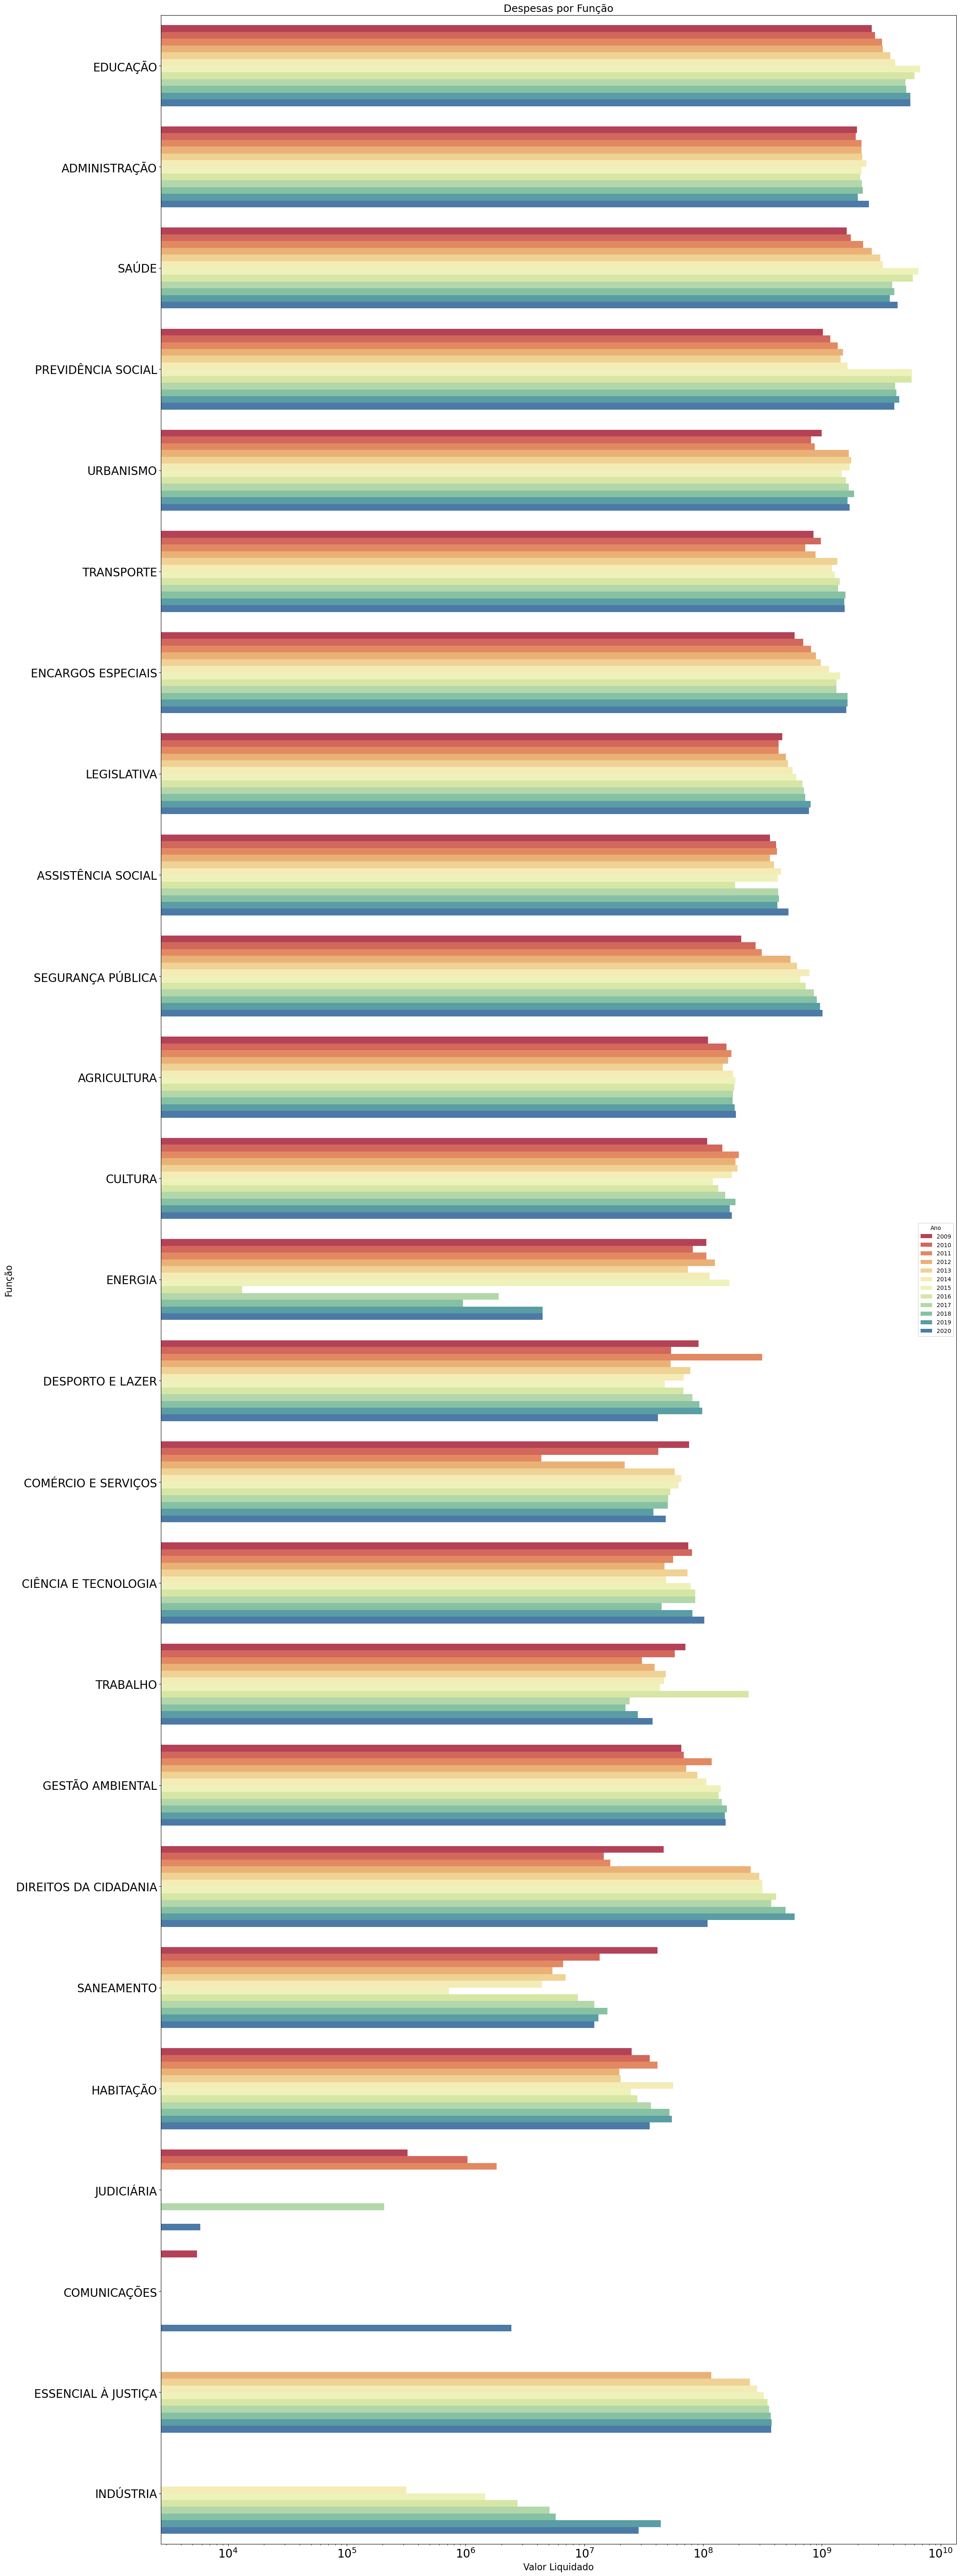

In [3]:
plt.figure(figsize=(25,80))
ax_log_dpf = sns.barplot(data=dpf_all_years,x="Liquidado",y="Função",hue="Ano",
                         palette="Spectral")
ax_log_dpf.axes.set_title("Despesas por Função",fontsize=18)
ax_log_dpf.set_xlabel("Valor Liquidado",fontsize=16)
ax_log_dpf.set_ylabel("Função",fontsize=16)
ax_log_dpf.tick_params(labelsize=20)
ax_log_dpf.set_xscale("log")
plt.show()

## 2.2 Despesas por função - 2020

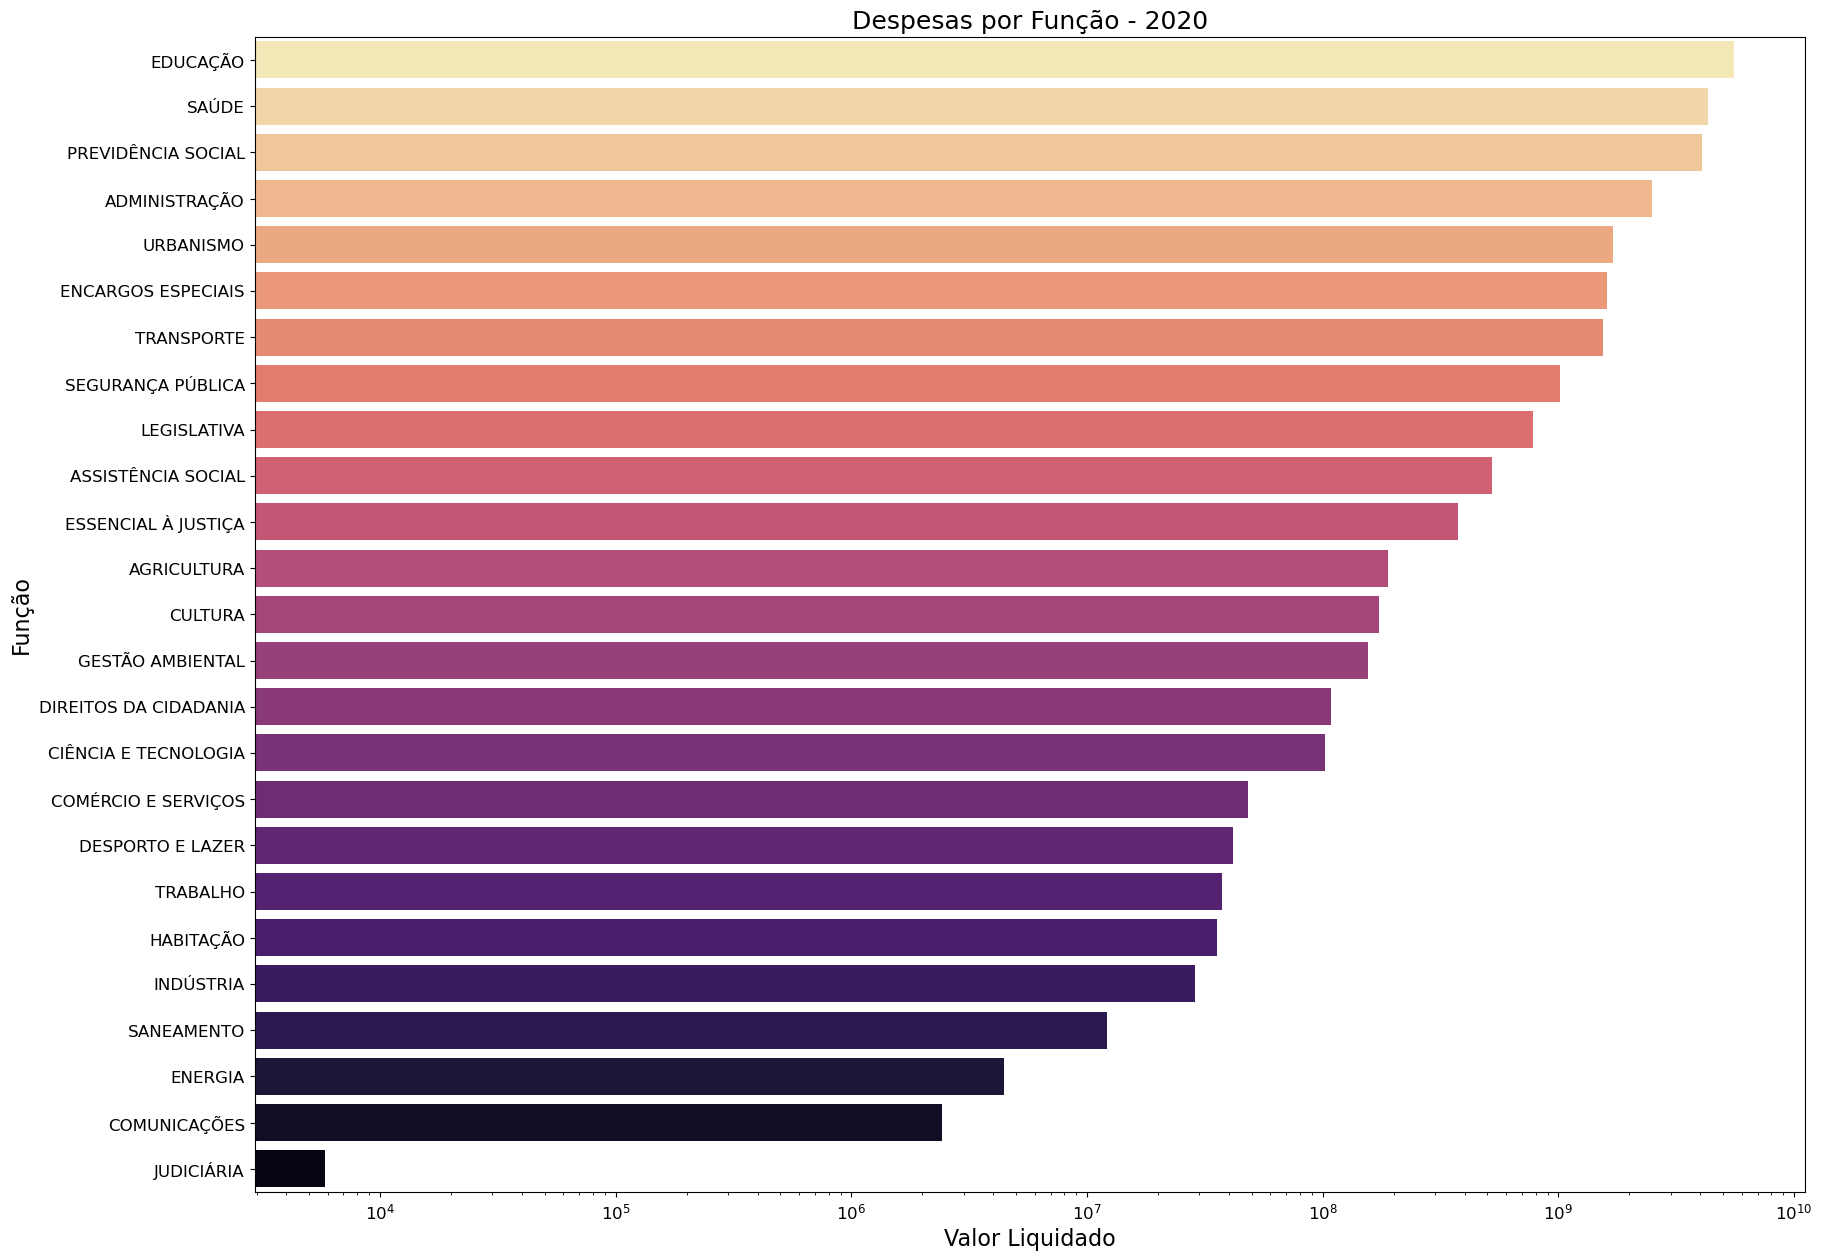

In [4]:
plt.figure(figsize=(20,15))
ax_log_2020 = sns.barplot(dpf_2020,x="Liquidado",y="Função",palette="magma_r")
ax_log_2020.axes.set_title("Despesas por Função - 2020",fontsize=18)
ax_log_2020.set_xlabel("Valor Liquidado",fontsize=16)
ax_log_2020.set_ylabel("Função",fontsize=16)
ax_log_2020.tick_params(labelsize=12)
ax_log_2020.set_xscale("log")
plt.show()

## 2.3 Despesas por ano em Transporte

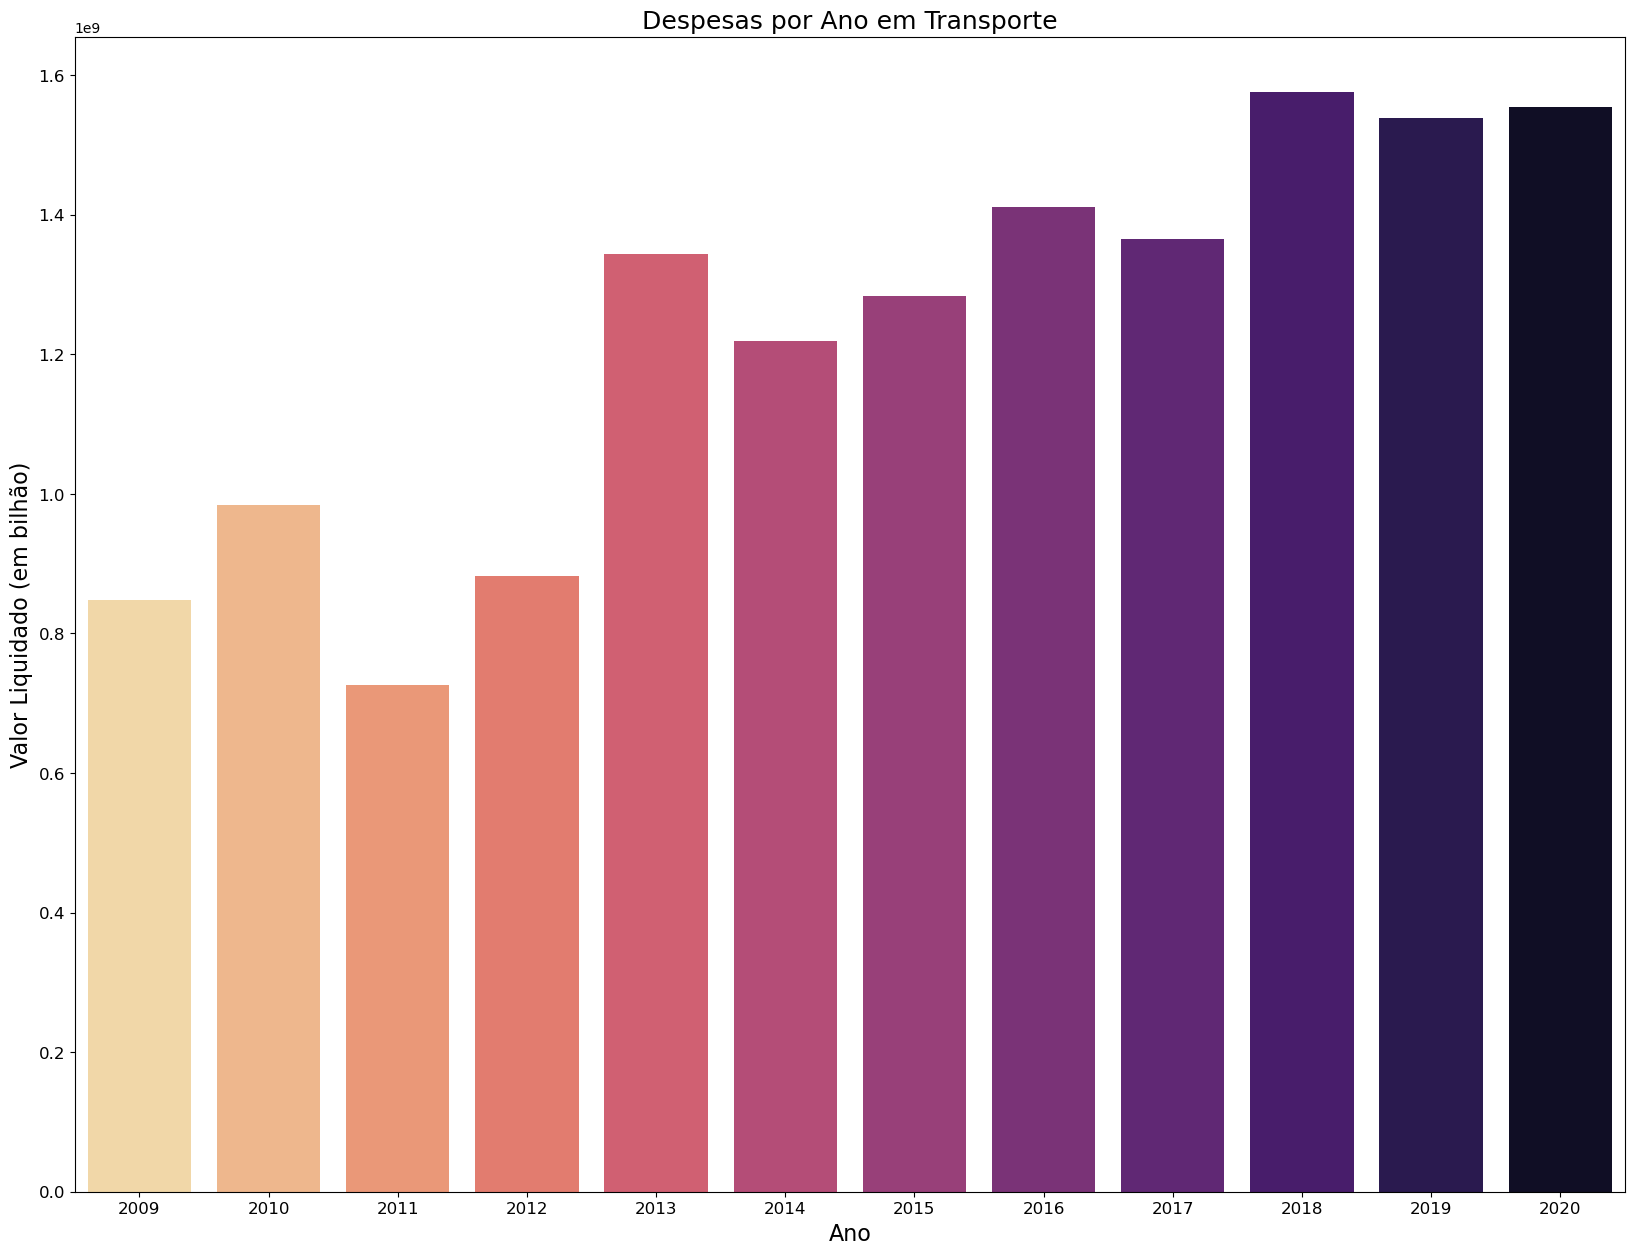

In [5]:
plt.figure(figsize=(20,15))
ax = sns.barplot(transporte_yearly,x=transporte_yearly.index,y="Liquidado",
                 palette="magma_r")
ax.axes.set_title("Despesas por Ano em Transporte",fontsize=18)
ax.set_xlabel("Ano",fontsize=16)
ax.set_ylabel("Valor Liquidado (em bilhão)",fontsize=16)
ax.tick_params(labelsize=12)
plt.show()

- 2011: Licitação do Sistema de Transporte Público Coletivo (ônibus) - 5 empresas diferentes, com estipulação de tarifas técnicas como remuneração das empresas concessionárias.

- 2012: Contratos assinados (verificar).

- 2015: CPI (não deu em nada)